## Exercise 1.2: Design and test K-nearest neighbor (KNN) classification on MNIST data

### (I) Run mnistKNNdemo (from pyprobml or pmtk3) on the first 1000 test samples of the MNIST data. Compare the misclassification rates. 

KNN Classifier from pyprobml is applied to a 2d dataset with 3 classes. MNIST dataset has 784 features and 10 classes. we will need to try and see if it will run, and if not adjust it for the multidimensiona data in the dataset.

In [1]:
# First we Import the data

import numpy as np
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [3]:
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
ntrain = 10000
ntest = 69000
x_train = X[:ntrain]
y_train = y[:ntrain]
x_test = X[ntest:]
y_test = y[ntest:]

In [6]:
x_train.shape

(10000, 784)

In [7]:
y_train.shape

(10000,)

In [8]:
x_test.shape

(1000, 784)

In [9]:
y_test.shape

(1000,)

In [10]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), array([1001, 1127,  991, 1032,  980,  863, 1014, 1070,  944,  978],
      dtype=int64))
(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), array([102, 119,  99, 102,  92,  85, 102, 115,  94,  90], dtype=int64))


In [11]:
from sklearn.neighbors import KNeighborsClassifier
import timeit

kVals = np.arange(1,100,10)

for k in kVals:
    start = timeit.default_timer()
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    end = timeit.default_timer()
    # evaluate the model and update the accuracies list
    score = model.score(x_test, y_test)
    print("k=%d, accuracy=%.2f%%, time=%.4f" % (k, score * 100,end-start))

k=1, accuracy=95.40%, time=0.0237
k=11, accuracy=95.10%, time=0.0150
k=21, accuracy=93.90%, time=0.0176
k=31, accuracy=93.50%, time=0.0140
k=41, accuracy=92.20%, time=0.0141
k=51, accuracy=91.80%, time=0.0146
k=61, accuracy=91.40%, time=0.0147
k=71, accuracy=91.20%, time=0.0148
k=81, accuracy=90.90%, time=0.0150
k=91, accuracy=90.60%, time=0.0153


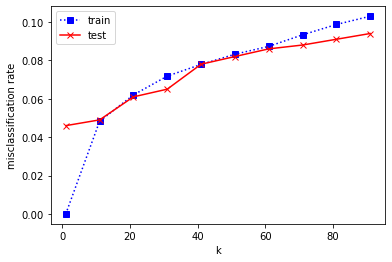

In [12]:
#plot train err and test err with different k
#ks = [int(n) for n in np.linspace(1, ntrain, 10)]
ks = np.arange(1,100,10)
train_errs = []
test_errs = []
for k in ks:
  knn = KNN(n_neighbors=k)
  knn.fit(x_train, y_train)
  train_errs.append(1 - knn.score(x_train, y_train))
  test_errs.append(1 - knn.score(x_test, y_test))
plt.figure()
plt.plot(ks, train_errs, 'bs:', label='train')
plt.plot(ks, test_errs, 'rx-', label='test')
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')
plt.show()



Text(0.5, 1.0, '5-fold cross validation, n-train = 1000')

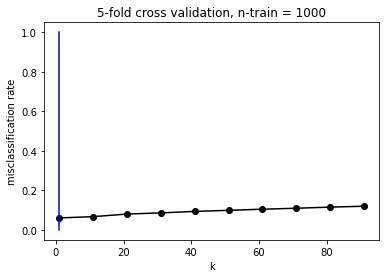

In [13]:
#cross_validate
scores = []
for k in ks:
    knn = KNN(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=5)
    scores.append(1 - score.mean())
plt.figure()
plt.plot(ks, scores, 'ko-')
min_k = ks[np.argmin(scores)]
plt.plot([min_k, min_k], [0, 1.0], 'b-')
plt.xlabel('k')
plt.ylabel('misclassification rate')
plt.title('5-fold cross validation, n-train = 1000')


In [14]:
from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       102
           1       0.94      1.00      0.97       119
           2       0.95      0.83      0.89        99
           3       0.97      0.97      0.97       102
           4       0.99      0.97      0.98        92
           5       0.96      0.93      0.95        85
           6       0.97      0.99      0.98       102
           7       0.95      0.96      0.95       115
           8       0.97      0.98      0.97        94
           9       0.98      0.96      0.97        90

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



### (II) Combine FLANN (https://github.com/mariusmuja/flann (Links to an external site.)) for approximate nearest neighbor search with mnistKNNdemo to classify the first 1000 test samples of the MNIST data.

In [15]:
from pyflann import *

flann = FLANN()
result, dists = flann.nn(x_train, x_test, 5, algorithm="kmeans", branching=32, iterations=7, checks=16)
print (result)
print (dists)

[[3788  123 9644 1513 5253]
 [5374 2657 4587 3779 6201]
 [5644 7689 1069 3393 8331]
 ...
 [8677 8943 3239 6009 2467]
 [1311 6011 6471 5991 4695]
 [5179 5329 5273 1297 8407]]
[[1631486. 1680727. 1816367. 2118836. 2120485.]
 [2305114. 2443013. 2611756. 2642519. 2900007.]
 [ 281587.  354474.  486873.  508080.  527536.]
 ...
 [1431547. 1582512. 1709599. 2045924. 2073367.]
 [1784672. 1899672. 1952869. 2059832. 2136121.]
 [1503488. 1694296. 1960099. 2133393. 2306158.]]


In [16]:
start = timeit.default_timer()
train_labels = y_train[result]
end = timeit.default_timer()
print(train_labels)
print(end-start)

[['7' '7' '7' '7' '7']
 ['6' '6' '6' '6' '6']
 ['1' '1' '1' '1' '1']
 ...
 ['4' '4' '4' '4' '4']
 ['5' '5' '5' '5' '5']
 ['6' '6' '6' '6' '6']]
0.00019329999997808045


In [17]:
from scipy import stats
mode_l = stats.mode(train_labels, axis=1)

In [18]:
y_flann_pred = mode_l.mode
y_flann_pred = y_flann_pred.squeeze()
y_flann_pred.shape

(1000,)

In [19]:
y_test.shape

(1000,)

In [20]:
print(classification_report(y_test,y_flann_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       102
           1       0.97      0.99      0.98       119
           2       0.91      0.82      0.86        99
           3       0.96      0.94      0.95       102
           4       0.99      0.98      0.98        92
           5       0.93      0.91      0.92        85
           6       0.97      0.98      0.98       102
           7       0.91      0.92      0.91       115
           8       0.85      0.94      0.89        94
           9       0.96      0.88      0.92        90

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [21]:
# For k=1 no need to get the mode, as there is only one result

# print(classification_report(y_test,train_labels))

 ### (III) Design and test multinomial logistic regression for the MNIST data. 

In [22]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [23]:
start = timeit.default_timer()
logisticRegr.fit(x_train, y_train)
end = timeit.default_timer()
print(end-start)

2.699477700000017


C:\Users\ostavre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
y_logr_pred = logisticRegr.predict(x_test)

In [25]:
print(classification_report(y_test,y_logr_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.95      0.97      0.96       119
           2       0.85      0.80      0.82        99
           3       0.88      0.86      0.87       102
           4       0.92      0.87      0.89        92
           5       0.78      0.81      0.80        85
           6       0.90      0.95      0.92       102
           7       0.91      0.89      0.90       115
           8       0.78      0.86      0.82        94
           9       0.89      0.83      0.86        90

    accuracy                           0.89      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.89      0.89      1000



### (IV) Compare the computation time and misclassification rates of the classifiers in (I)-(III).